In [78]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/popular-video-games-1980-2023/games.csv


In [133]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Importing pyplot from matplotlib.dates for dates manipulation
import matplotlib.dates as mdates
# Importing tqdm for progress bars in loops
from tqdm.notebook import tqdm
from sklearn.model_selection import train_test_split






sns.set_style("darkgrid")

In [134]:
df_origin = pd.read_csv("/kaggle/input/popular-video-games-1980-2023/games.csv")
df = df_origin.copy()
df.head()

,Unnamed: 0,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
0,0,Elden Ring,"Feb 25, 2022","['Bandai Namco Entertainment', 'FromSoftware']",4.5,3.9K,3.9K,"['Adventure', 'RPG']","Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",17K,3.8K,4.6K,4.8K
1,1,Hades,"Dec 10, 2019",['Supergiant Games'],4.3,2.9K,2.9K,"['Adventure', 'Brawler', 'Indie', 'RPG']",A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,21K,3.2K,6.3K,3.6K
2,2,The Legend of Zelda: Breath of the Wild,"Mar 03, 2017","['Nintendo', 'Nintendo EPD Production Group No...",4.4,4.3K,4.3K,"['Adventure', 'RPG']",The Legend of Zelda: Breath of the Wild is the...,['This game is the game (that is not CS:GO) th...,30K,2.5K,5K,2.6K
3,3,Undertale,"Sep 15, 2015","['tobyfox', '8-4']",4.2,3.5K,3.5K,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra...","A small child falls into the Underground, wher...",['soundtrack is tied for #1 with nier automata...,28K,679,4.9K,1.8K
4,4,Hollow Knight,"Feb 24, 2017",['Team Cherry'],4.4,3K,3K,"['Adventure', 'Indie', 'Platform']",A 2D metroidvania with an emphasis on close co...,"[""this games worldbuilding is incredible, with...",21K,2.4K,8.3K,2.3K


In [135]:
df.columns

Index(['Unnamed: 0', 'Title', 'Release Date', 'Team', 'Rating', 'Times Listed',
       'Number of Reviews', 'Genres', 'Summary', 'Reviews', 'Plays', 'Playing',
       'Backlogs', 'Wishlist'],
      dtype='object')

In [136]:
df.shape

(1512, 14)

In [137]:
df.info

<bound method DataFrame.info of       Unnamed: 0                                    Title  Release Date  \
0              0                               Elden Ring  Feb 25, 2022   
1              1                                    Hades  Dec 10, 2019   
2              2  The Legend of Zelda: Breath of the Wild  Mar 03, 2017   
3              3                                Undertale  Sep 15, 2015   
4              4                            Hollow Knight  Feb 24, 2017   
...          ...                                      ...           ...   
1507        1507             Back to the Future: The Game  Dec 22, 2010   
1508        1508                        Team Sonic Racing  May 21, 2019   
1509        1509                           Dragon's Dogma  May 22, 2012   
1510        1510                          Baldur's Gate 3  Oct 06, 2020   
1511        1511                 The LEGO Movie Videogame  Feb 04, 2014   

                                                   Team  Rating Tim

In [139]:
df.dtypes

Unnamed: 0             int64
Title                 object
Release Date          object
Team                  object
Rating               float64
Times Listed          object
Number of Reviews     object
Genres                object
Summary               object
Reviews               object
Plays                 object
Playing               object
Backlogs              object
Wishlist              object
dtype: object

In [140]:
df.describe()

,Unnamed: 0,Rating
count,1512.000000,1499.000000
mean,755.500000,3.719346
std,436.621117,0.532608
min,0.000000,0.700000
25%,377.750000,3.400000
50%,755.500000,3.800000
75%,1133.250000,4.100000
max,1511.000000,4.800000


In [141]:
df.isnull().sum().to_frame().T

,Unnamed: 0,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
0,0,0,0,1,13,0,0,0,1,0,0,0,0,0


In [142]:
df.drop(['Unnamed: 0'], axis=1)

,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
0,Elden Ring,"Feb 25, 2022","['Bandai Namco Entertainment', 'FromSoftware']",4.5,3.9K,3.9K,"['Adventure', 'RPG']","Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",17K,3.8K,4.6K,4.8K
1,Hades,"Dec 10, 2019",['Supergiant Games'],4.3,2.9K,2.9K,"['Adventure', 'Brawler', 'Indie', 'RPG']",A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,21K,3.2K,6.3K,3.6K
2,The Legend of Zelda: Breath of the Wild,"Mar 03, 2017","['Nintendo', 'Nintendo EPD Production Group No...",4.4,4.3K,4.3K,"['Adventure', 'RPG']",The Legend of Zelda: Breath of the Wild is the...,['This game is the game (that is not CS:GO) th...,30K,2.5K,5K,2.6K
3,Undertale,"Sep 15, 2015","['tobyfox', '8-4']",4.2,3.5K,3.5K,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra...","A small child falls into the Underground, wher...",['soundtrack is tied for #1 with nier automata...,28K,679,4.9K,1.8K
4,Hollow Knight,"Feb 24, 2017",['Team Cherry'],4.4,3K,3K,"['Adventure', 'Indie', 'Platform']",A 2D metroidvania with an emphasis on close co...,"[""this games worldbuilding is incredible, with...",21K,2.4K,8.3K,2.3K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1507,Back to the Future: The Game,"Dec 22, 2010",['Telltale Games'],3.2,94,94,"['Adventure', 'Point-and-Click']",Back to the Future: The Game is one of Telltal...,['Very enjoyable game. The story adds onto the...,763,5,223,67
1508,Team Sonic Racing,"May 21, 2019","['Sumo Digital', 'Sega']",2.9,264,264,"['Arcade', 'Racing']",Team Sonic Racing combines the best elements o...,"['jogo morto mas bom', 'not my cup of tea', ""C...",1.5K,49,413,107
1509,Dragon's Dogma,"May 22, 2012",['Capcom'],3.7,210,210,"['Brawler', 'RPG']","Set in a huge open world, Dragon’s Dogma: Dark...","['Underrated.', 'A grandes rasgos, es como un ...",1.1K,45,487,206
1510,Baldur's Gate 3,"Oct 06, 2020",['Larian Studios'],4.1,165,165,"['Adventure', 'RPG', 'Strategy', 'Tactical', '...","An ancient evil has returned to Baldur's Gate,...",['Bu türe bu oyunla girmeye çalışmak hataydı s...,269,79,388,602


In [143]:
#get mean of rating column
rating_mean = df["Rating"].mean()

#impute the rating column's mean to all the missing value in its column
df.Rating = df.Rating.fillna(rating_mean)
df.isnull().sum()

Unnamed: 0           0
Title                0
Release Date         0
Team                 1
Rating               0
Times Listed         0
Number of Reviews    0
Genres               0
Summary              1
Reviews              0
Plays                0
Playing              0
Backlogs             0
Wishlist             0
dtype: int64

In [144]:
df.loc[df['Team'].isnull()]

,Unnamed: 0,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
1245,1245,NEET Girl Date Night,"Oct 21, 2022",NaN,2.7,21,21,['Visual Novel'],Your friend sets you up on a date with his NEE...,"['this sucked. ""Omg she is literally me"" is no...",106,1,44,42


In [145]:
#NEET is missing a value in the team coulmn
#NEET is by hitsujigoods on Itch.io

#impute hitsujigoods for missing team 
df.Team = df.Team.fillna('hitsujigoods')

#check to see if team column still has missing value
df.isnull().sum()

Unnamed: 0           0
Title                0
Release Date         0
Team                 0
Rating               0
Times Listed         0
Number of Reviews    0
Genres               0
Summary              1
Reviews              0
Plays                0
Playing              0
Backlogs             0
Wishlist             0
dtype: int64

In [146]:
df.loc[df['Summary'].isnull()]


,Unnamed: 0,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
649,649,Death Stranding 2,releases on TBD,['Kojima Productions'],3.719346,105,105,"['Adventure', 'Shooter']",NaN,[],3,0,209,644


In [148]:
columns_to_change = ['Times Listed', 'Number of Reviews', 'Plays',
                     'Playing', 'Backlogs', 'Wishlist']

In [149]:
numeric_df = df.select_dtypes(include=np.number)

In [ ]:
def clean_column_names(df: pd.DataFrame) -> pd.DataFrame:
    """
    Rename columns in a DataFrame to lowercase with underscores instead of spaces.

    Parameters
    ----------
    df : pd.DataFrame
        The DataFrame containing the columns to be renamed.

    Returns
    -------
    pd.DataFrame
        The DataFrame with renamed columns.
    """

    # Use list comprehension to create a new list of column names with spaces replaced by underscores and all lowercase letters
    new_columns = [col.lower().replace(" ", "_") for col in df.columns]

    # Use the pandas DataFrame rename() method to rename the columns using the new column names list
    df = df.rename(columns=dict(zip(df.columns, new_columns)))

    return df



def drop_columns(df: pd.DataFrame, cols_to_drop: list = None, 
                 idx_to_drop: list = None) -> pd.DataFrame:
    """
    Drops the specified columns from a pandas DataFrame and returns a new DataFrame with the columns removed.
    
    Args:
    - df: A pandas DataFrame.
    - cols_to_drop: (Optional) A list of column names to drop from the DataFrame.
    - idx_to_drop: (Optional) A list of row indices to drop from the DataFrame.
    
    Returns:
    - A new pandas DataFrame with the specified columns and/or rows removed.
    
    Example:
    
    ```
    df = drop_columns(df, cols_to_drop=['column1', 'column2'], [3, 4])
    df = drop_columns(df, idx_to_drop=['column1.index', 'column2.index'], [3, 4])

    ```
    """
    # Create a copy of the original DataFrame
    new_df = df.copy()

    # Drop the specified columns from the DataFrame
    if cols_to_drop is not None:
        new_df = new_df.drop(columns=cols_to_drop)

    # Drop the specified rows from the DataFrame, if any
    if idx_to_drop is not None:
        new_df = new_df.drop(index=idx_to_drop)

    return new_df





In [150]:
def convert_str_num_to_int(df: pd.DataFrame, col_names: list) -> pd.DataFrame:
    """
    Converts string numerical values in a dataframe to int.

    Parameters:
        df (pandas.DataFrame): The dataframe to convert.
        col_names (list): A list of column names containing string numerical values.

    Returns:
        pandas.DataFrame: The modified dataframe.
    """
    
    # Talking a copy of the provided dataframe
    new_df = df.copy()
    
    # Looping over the columns names list and chaning   
    for col in col_names:
        # Replace 'K' with '000' and '.' with ''
        new_df[col] = new_df[col].str.replace("K", "000").str.replace(".", "")

        # Convert column to int type
        new_df[col] = new_df[col].astype(int)

    return new_df

In [151]:
df = clean_column_names(df)
df.head(5)

,unnamed:_0,title,release_date,team,rating,times_listed,number_of_reviews,genres,summary,reviews,plays,playing,backlogs,wishlist
0,0,Elden Ring,"Feb 25, 2022","['Bandai Namco Entertainment', 'FromSoftware']",4.5,3.9K,3.9K,"['Adventure', 'RPG']","Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",17K,3.8K,4.6K,4.8K
1,1,Hades,"Dec 10, 2019",['Supergiant Games'],4.3,2.9K,2.9K,"['Adventure', 'Brawler', 'Indie', 'RPG']",A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,21K,3.2K,6.3K,3.6K
2,2,The Legend of Zelda: Breath of the Wild,"Mar 03, 2017","['Nintendo', 'Nintendo EPD Production Group No...",4.4,4.3K,4.3K,"['Adventure', 'RPG']",The Legend of Zelda: Breath of the Wild is the...,['This game is the game (that is not CS:GO) th...,30K,2.5K,5K,2.6K
3,3,Undertale,"Sep 15, 2015","['tobyfox', '8-4']",4.2,3.5K,3.5K,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra...","A small child falls into the Underground, wher...",['soundtrack is tied for #1 with nier automata...,28K,679,4.9K,1.8K
4,4,Hollow Knight,"Feb 24, 2017",['Team Cherry'],4.4,3K,3K,"['Adventure', 'Indie', 'Platform']",A 2D metroidvania with an emphasis on close co...,"[""this games worldbuilding is incredible, with...",21K,2.4K,8.3K,2.3K


In [152]:
df.drop(['unnamed:_0'], axis=1)
df.head(5)

,unnamed:_0,title,release_date,team,rating,times_listed,number_of_reviews,genres,summary,reviews,plays,playing,backlogs,wishlist
0,0,Elden Ring,"Feb 25, 2022","['Bandai Namco Entertainment', 'FromSoftware']",4.5,3.9K,3.9K,"['Adventure', 'RPG']","Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",17K,3.8K,4.6K,4.8K
1,1,Hades,"Dec 10, 2019",['Supergiant Games'],4.3,2.9K,2.9K,"['Adventure', 'Brawler', 'Indie', 'RPG']",A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,21K,3.2K,6.3K,3.6K
2,2,The Legend of Zelda: Breath of the Wild,"Mar 03, 2017","['Nintendo', 'Nintendo EPD Production Group No...",4.4,4.3K,4.3K,"['Adventure', 'RPG']",The Legend of Zelda: Breath of the Wild is the...,['This game is the game (that is not CS:GO) th...,30K,2.5K,5K,2.6K
3,3,Undertale,"Sep 15, 2015","['tobyfox', '8-4']",4.2,3.5K,3.5K,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra...","A small child falls into the Underground, wher...",['soundtrack is tied for #1 with nier automata...,28K,679,4.9K,1.8K
4,4,Hollow Knight,"Feb 24, 2017",['Team Cherry'],4.4,3K,3K,"['Adventure', 'Indie', 'Platform']",A 2D metroidvania with an emphasis on close co...,"[""this games worldbuilding is incredible, with...",21K,2.4K,8.3K,2.3K


In [153]:
numeric_df = df.select_dtypes(include=np.number)
df.head(5)

,unnamed:_0,title,release_date,team,rating,times_listed,number_of_reviews,genres,summary,reviews,plays,playing,backlogs,wishlist
0,0,Elden Ring,"Feb 25, 2022","['Bandai Namco Entertainment', 'FromSoftware']",4.5,3.9K,3.9K,"['Adventure', 'RPG']","Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",17K,3.8K,4.6K,4.8K
1,1,Hades,"Dec 10, 2019",['Supergiant Games'],4.3,2.9K,2.9K,"['Adventure', 'Brawler', 'Indie', 'RPG']",A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,21K,3.2K,6.3K,3.6K
2,2,The Legend of Zelda: Breath of the Wild,"Mar 03, 2017","['Nintendo', 'Nintendo EPD Production Group No...",4.4,4.3K,4.3K,"['Adventure', 'RPG']",The Legend of Zelda: Breath of the Wild is the...,['This game is the game (that is not CS:GO) th...,30K,2.5K,5K,2.6K
3,3,Undertale,"Sep 15, 2015","['tobyfox', '8-4']",4.2,3.5K,3.5K,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra...","A small child falls into the Underground, wher...",['soundtrack is tied for #1 with nier automata...,28K,679,4.9K,1.8K
4,4,Hollow Knight,"Feb 24, 2017",['Team Cherry'],4.4,3K,3K,"['Adventure', 'Indie', 'Platform']",A 2D metroidvania with an emphasis on close co...,"[""this games worldbuilding is incredible, with...",21K,2.4K,8.3K,2.3K


In [154]:
df.drop(['unnamed:_0'], axis=1)
df.head(5)

,unnamed:_0,title,release_date,team,rating,times_listed,number_of_reviews,genres,summary,reviews,plays,playing,backlogs,wishlist
0,0,Elden Ring,"Feb 25, 2022","['Bandai Namco Entertainment', 'FromSoftware']",4.5,3.9K,3.9K,"['Adventure', 'RPG']","Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",17K,3.8K,4.6K,4.8K
1,1,Hades,"Dec 10, 2019",['Supergiant Games'],4.3,2.9K,2.9K,"['Adventure', 'Brawler', 'Indie', 'RPG']",A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,21K,3.2K,6.3K,3.6K
2,2,The Legend of Zelda: Breath of the Wild,"Mar 03, 2017","['Nintendo', 'Nintendo EPD Production Group No...",4.4,4.3K,4.3K,"['Adventure', 'RPG']",The Legend of Zelda: Breath of the Wild is the...,['This game is the game (that is not CS:GO) th...,30K,2.5K,5K,2.6K
3,3,Undertale,"Sep 15, 2015","['tobyfox', '8-4']",4.2,3.5K,3.5K,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra...","A small child falls into the Underground, wher...",['soundtrack is tied for #1 with nier automata...,28K,679,4.9K,1.8K
4,4,Hollow Knight,"Feb 24, 2017",['Team Cherry'],4.4,3K,3K,"['Adventure', 'Indie', 'Platform']",A 2D metroidvania with an emphasis on close co...,"[""this games worldbuilding is incredible, with...",21K,2.4K,8.3K,2.3K


In [156]:
df["times_listed"] = df["times_listed"].str.replace("K", "00").str.replace(".", "")
df["number_of_reviews"] = df["number_of_reviews"].str.replace("K", "00").str.replace(".", "")
df["backlogs"] = df["backlogs"].str.replace("K", "00").str.replace(".", "")
df["plays"] = df["plays"].str.replace("K", "00").str.replace(".", "")
df["playing"] = df["playing"].str.replace("K", "00").str.replace(".", "")
df["wishlist"] = df["wishlist"].str.replace("K", "00").str.replace(".", "")
df.head(5)

/tmp/ipykernel_34/2742015414.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["times_listed"] = df["times_listed"].str.replace("K", "00").str.replace(".", "")
/tmp/ipykernel_34/2742015414.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["number_of_reviews"] = df["number_of_reviews"].str.replace("K", "00").str.replace(".", "")
/tmp/ipykernel_34/2742015414.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["backlogs"] = df["backlogs"].str.replace("K", "00").str.replace(".", "")
/tmp/ipykernel_34/2742015414.

,unnamed:_0,title,release_date,team,rating,times_listed,number_of_reviews,genres,summary,reviews,plays,playing,backlogs,wishlist
0,0,Elden Ring,"Feb 25, 2022","['Bandai Namco Entertainment', 'FromSoftware']",4.5,3900,3900,"['Adventure', 'RPG']","Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",1700,3800,4600,4800
1,1,Hades,"Dec 10, 2019",['Supergiant Games'],4.3,2900,2900,"['Adventure', 'Brawler', 'Indie', 'RPG']",A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,2100,3200,6300,3600
2,2,The Legend of Zelda: Breath of the Wild,"Mar 03, 2017","['Nintendo', 'Nintendo EPD Production Group No...",4.4,4300,4300,"['Adventure', 'RPG']",The Legend of Zelda: Breath of the Wild is the...,['This game is the game (that is not CS:GO) th...,3000,2500,500,2600
3,3,Undertale,"Sep 15, 2015","['tobyfox', '8-4']",4.2,3500,3500,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra...","A small child falls into the Underground, wher...",['soundtrack is tied for #1 with nier automata...,2800,679,4900,1800
4,4,Hollow Knight,"Feb 24, 2017",['Team Cherry'],4.4,300,300,"['Adventure', 'Indie', 'Platform']",A 2D metroidvania with an emphasis on close co...,"[""this games worldbuilding is incredible, with...",2100,2400,8300,2300


In [157]:
df.head()

,unnamed:_0,title,release_date,team,rating,times_listed,number_of_reviews,genres,summary,reviews,plays,playing,backlogs,wishlist
0,0,Elden Ring,"Feb 25, 2022","['Bandai Namco Entertainment', 'FromSoftware']",4.5,3900,3900,"['Adventure', 'RPG']","Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",1700,3800,4600,4800
1,1,Hades,"Dec 10, 2019",['Supergiant Games'],4.3,2900,2900,"['Adventure', 'Brawler', 'Indie', 'RPG']",A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,2100,3200,6300,3600
2,2,The Legend of Zelda: Breath of the Wild,"Mar 03, 2017","['Nintendo', 'Nintendo EPD Production Group No...",4.4,4300,4300,"['Adventure', 'RPG']",The Legend of Zelda: Breath of the Wild is the...,['This game is the game (that is not CS:GO) th...,3000,2500,500,2600
3,3,Undertale,"Sep 15, 2015","['tobyfox', '8-4']",4.2,3500,3500,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra...","A small child falls into the Underground, wher...",['soundtrack is tied for #1 with nier automata...,2800,679,4900,1800
4,4,Hollow Knight,"Feb 24, 2017",['Team Cherry'],4.4,300,300,"['Adventure', 'Indie', 'Platform']",A 2D metroidvania with an emphasis on close co...,"[""this games worldbuilding is incredible, with...",2100,2400,8300,2300


In [158]:
numeric_df.describe().T

,count,mean,std,min,25%,50%,75%,max
unnamed:_0,1512.0,755.500000,436.621117,0.0,377.75,755.5,1133.25,1511.0
rating,1512.0,3.719346,0.530311,0.7,3.40,3.8,4.10,4.8


In [159]:
numeric_df.head()

,unnamed:_0,rating
0,0,4.5
1,1,4.3
2,2,4.4
3,3,4.2
4,4,4.4


In [160]:
def convert_str_num_to_int(df: pd.DataFrame, col_names: list) -> pd.DataFrame:
    """
    Converts string numerical values in a dataframe to int.

    Parameters:
        df (pandas.DataFrame): The dataframe to convert.
        col_names (list): A list of column names containing string numerical values.

    Returns:
        pandas.DataFrame: The modified dataframe.
    """
    
    # Talking a copy of the provided dataframe
    new_df = df.copy()
    
    # Looping over the columns names list and chaning   
    for col in col_names:
        # Replace 'K' with '000' and '.' with ''
        new_df[col] = new_df[col].str.replace("K", "000").str.replace(".", "")

        # Convert column to int type
        new_df[col] = new_df[col].astype(int)

    return new_df

In [161]:
df.head()

,unnamed:_0,title,release_date,team,rating,times_listed,number_of_reviews,genres,summary,reviews,plays,playing,backlogs,wishlist
0,0,Elden Ring,"Feb 25, 2022","['Bandai Namco Entertainment', 'FromSoftware']",4.5,3900,3900,"['Adventure', 'RPG']","Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",1700,3800,4600,4800
1,1,Hades,"Dec 10, 2019",['Supergiant Games'],4.3,2900,2900,"['Adventure', 'Brawler', 'Indie', 'RPG']",A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,2100,3200,6300,3600
2,2,The Legend of Zelda: Breath of the Wild,"Mar 03, 2017","['Nintendo', 'Nintendo EPD Production Group No...",4.4,4300,4300,"['Adventure', 'RPG']",The Legend of Zelda: Breath of the Wild is the...,['This game is the game (that is not CS:GO) th...,3000,2500,500,2600
3,3,Undertale,"Sep 15, 2015","['tobyfox', '8-4']",4.2,3500,3500,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra...","A small child falls into the Underground, wher...",['soundtrack is tied for #1 with nier automata...,2800,679,4900,1800
4,4,Hollow Knight,"Feb 24, 2017",['Team Cherry'],4.4,300,300,"['Adventure', 'Indie', 'Platform']",A 2D metroidvania with an emphasis on close co...,"[""this games worldbuilding is incredible, with...",2100,2400,8300,2300


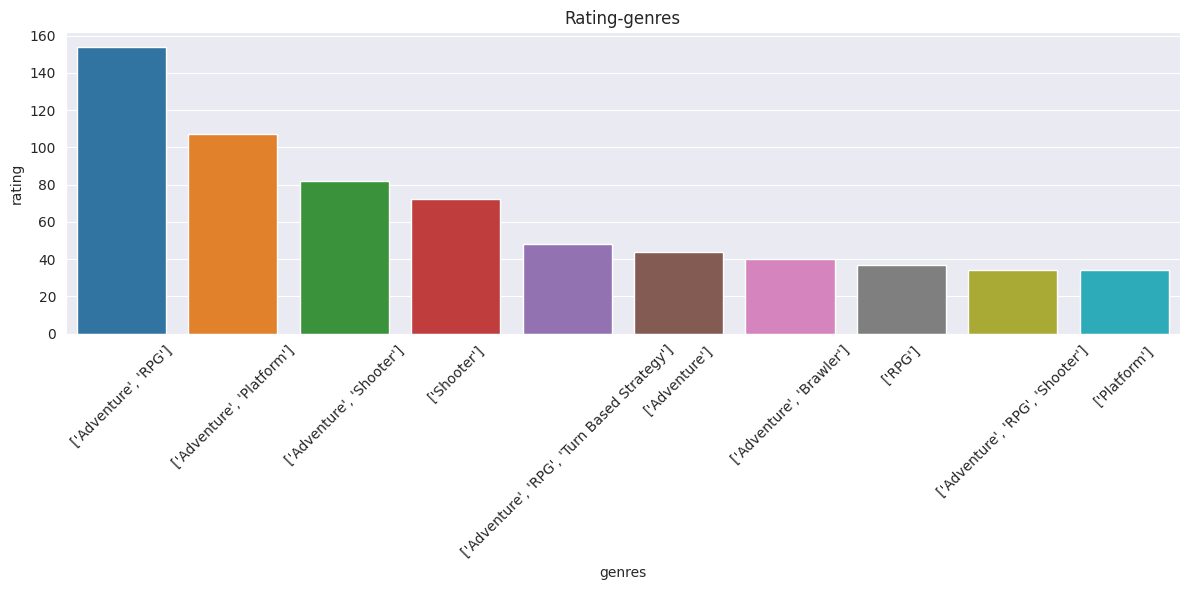

In [162]:
top_10_groups = df[df['genres'] != 'Unknown']['genres'].value_counts().nlargest(10)

# Draw a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_groups.index, y=top_10_groups.values)
plt.xticks(rotation=45)

# Axis and title settings

plt.xlabel('genres')
plt.ylabel('rating')
plt.title('Rating-genres')

# Show the chart
plt.tight_layout() #automatically adjust the layout of the graphics
plt.show()

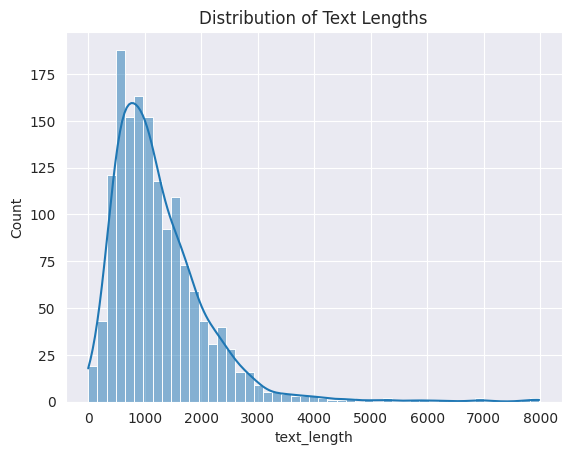

In [164]:
df['text_length'] = df['reviews'].apply(len)
sns.histplot(x='text_length', data=df, kde = True)
plt.title('Distribution of Text Lengths')
plt.show()

/tmp/ipykernel_34/1927004245.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax = sns.heatmap(df.corr(),annot=True)


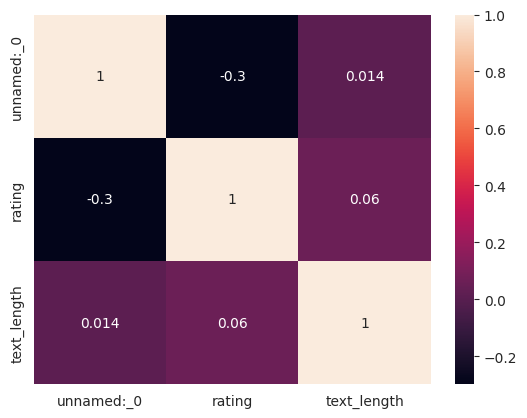

In [165]:
ax = sns.heatmap(df.corr(),annot=True)

In [ ]:
df.head()

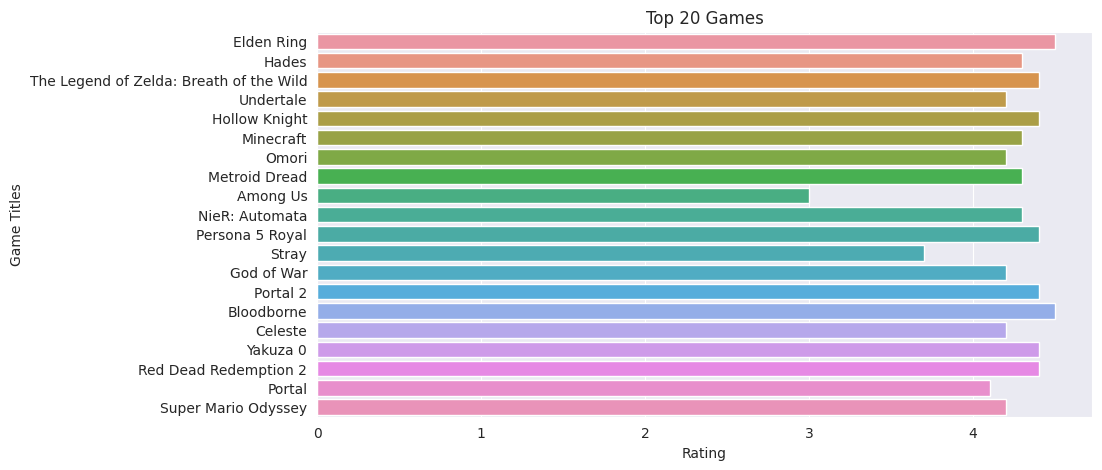

In [166]:
#First 20 games rating
games = df['title'].iloc[0:20]
#print(games)

rating = df['rating'].iloc[0:20]
#print(rating)

game_rating = df.groupby(games).size().reset_index(name='rating')

# Set width and height of figure
plt.figure(figsize=(10,5))

# Add title
plt.title("Top 20 Games")

# Bar chart showing First 20 games rating
sns.barplot(x=rating, y=games, data=game_rating)

# label vertical axis
plt.ylabel("Game Titles")

# label horizontal axis
plt.xlabel("Rating")

# Show the plot
plt.show()

In [167]:
genres_dict = {}
for index, row in df.iterrows():
    x = row['genres'].replace('[', '').replace(']', '').replace("'", '').split(',')
    
    for genre in x:
        if genre not in genres_dict:
            genres_dict[genre] = 1
        else:
            genres_dict[genre] += 1

In [168]:
tmp_df = pd.DataFrame({'genre': genres_dict.keys(),
              'count': genres_dict.values()})

<AxesSubplot: xlabel='count', ylabel='genre'>

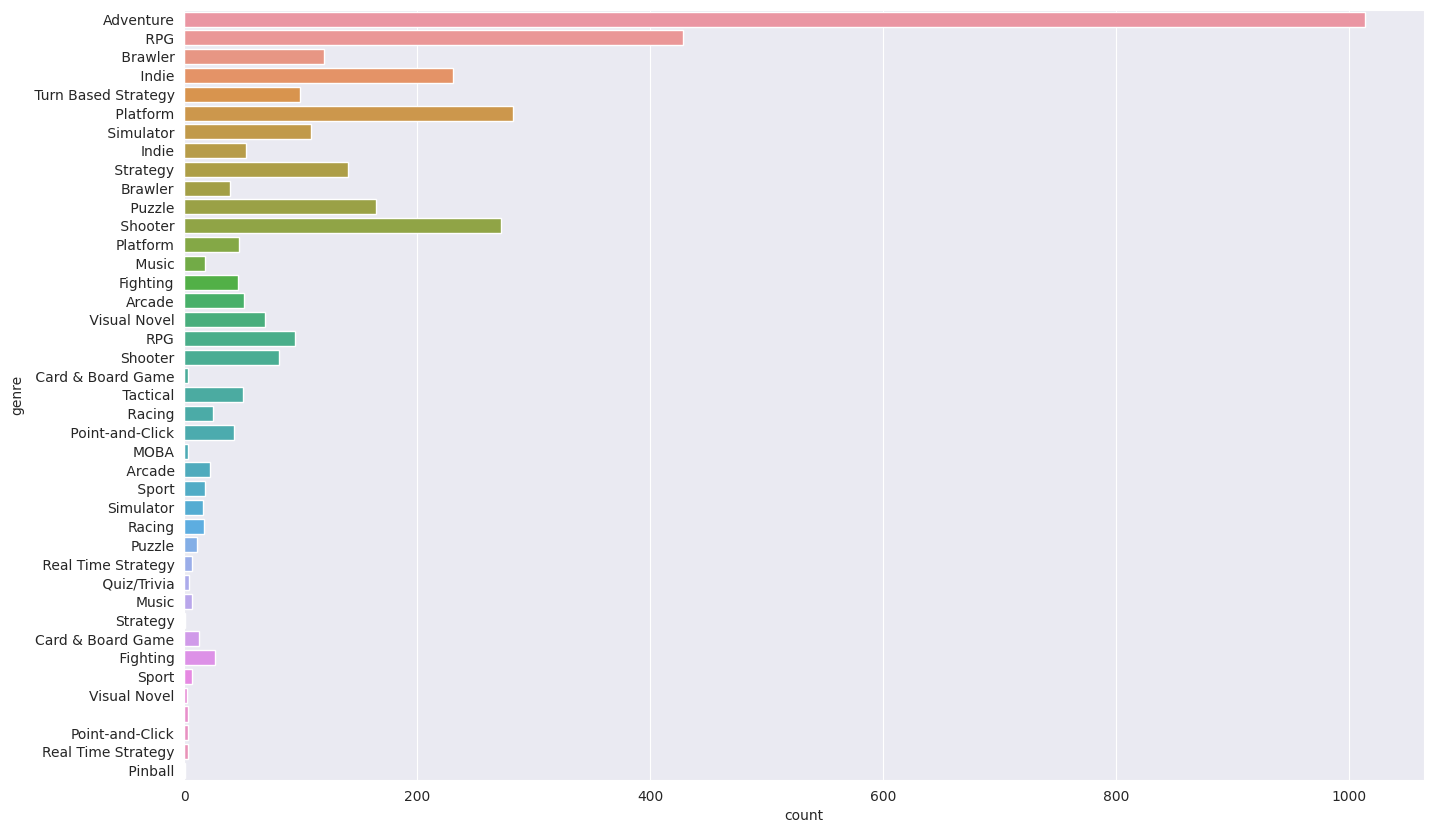

In [169]:
plt.figure(figsize=(16,10))
sns.barplot(data= tmp_df, y='genre', x='count')

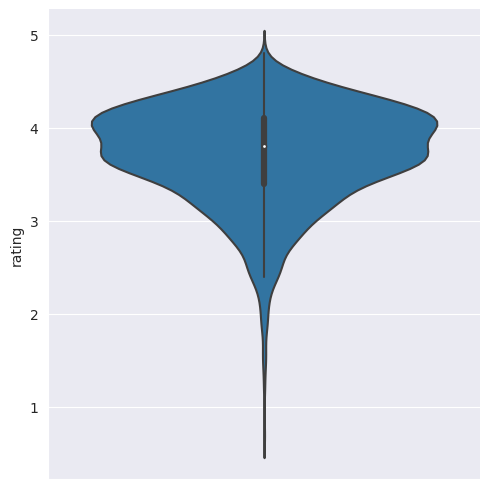

In [170]:
sns.catplot(y= "rating", kind= "violin", data= df)

<AxesSubplot: xlabel='number_of_reviews', ylabel='rating'>

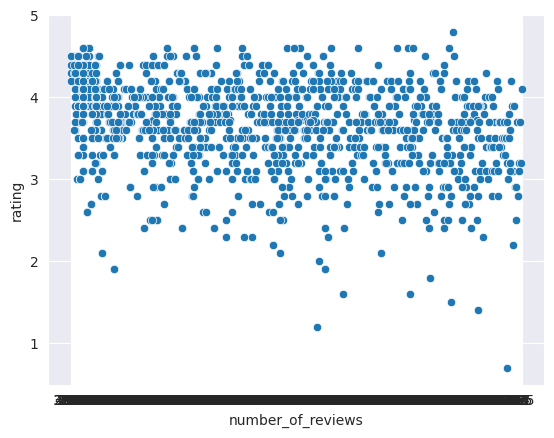

In [172]:
sns.scatterplot(x="number_of_reviews", y="rating", data=df)

In [175]:
df.head()

,unnamed:_0,title,release_date,team,rating,times_listed,number_of_reviews,genres,summary,reviews,plays,playing,backlogs,wishlist,text_length
0,0,Elden Ring,"Feb 25, 2022","['Bandai Namco Entertainment', 'FromSoftware']",4.5,3900,3900,"['Adventure', 'RPG']","Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",1700,3800,4600,4800,1281
1,1,Hades,"Dec 10, 2019",['Supergiant Games'],4.3,2900,2900,"['Adventure', 'Brawler', 'Indie', 'RPG']",A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,2100,3200,6300,3600,1858
2,2,The Legend of Zelda: Breath of the Wild,"Mar 03, 2017","['Nintendo', 'Nintendo EPD Production Group No...",4.4,4300,4300,"['Adventure', 'RPG']",The Legend of Zelda: Breath of the Wild is the...,['This game is the game (that is not CS:GO) th...,3000,2500,500,2600,1742
3,3,Undertale,"Sep 15, 2015","['tobyfox', '8-4']",4.2,3500,3500,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra...","A small child falls into the Underground, wher...",['soundtrack is tied for #1 with nier automata...,2800,679,4900,1800,798
4,4,Hollow Knight,"Feb 24, 2017",['Team Cherry'],4.4,300,300,"['Adventure', 'Indie', 'Platform']",A 2D metroidvania with an emphasis on close co...,"[""this games worldbuilding is incredible, with...",2100,2400,8300,2300,2622


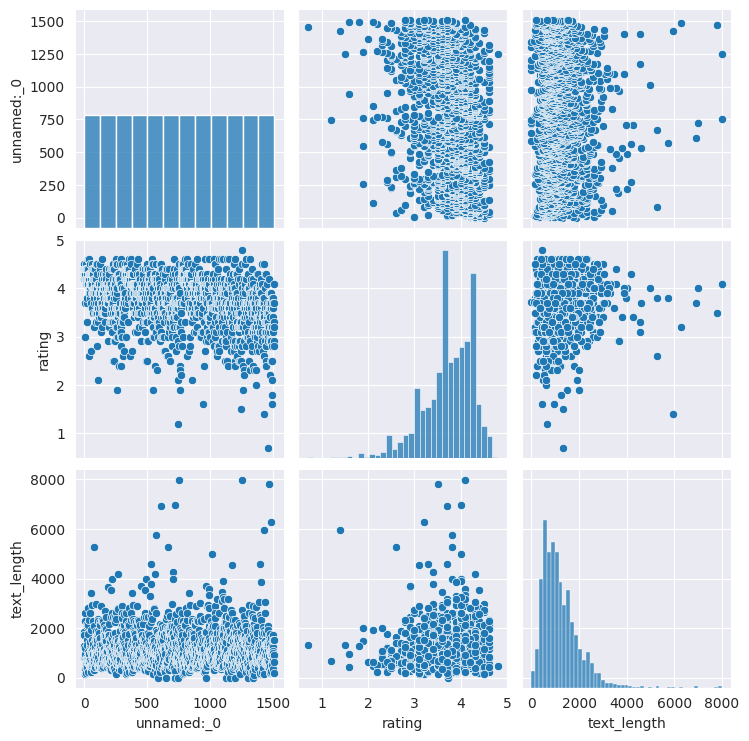

In [ ]:
sns.pairplot(df)

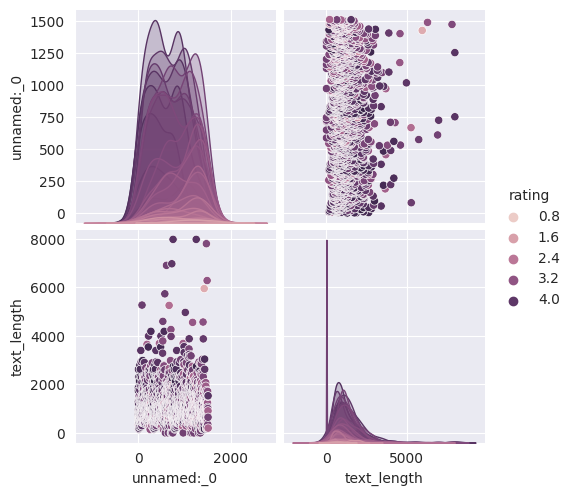

In [ ]:
sns.pairplot(df, hue="rating")